# Homework 3: Graph Optimization - Real-World Applications

## Overview

This homework contains two real-world case studies:

1. **Exercise 1**: Internet Service Provider Network Design (Kruskal's MST)
2. **Exercise 2**: Food Delivery Route Optimization (Dijkstra's Shortest Path)

Each exercise has **3 TODO sections** where you need to complete the implementation.

## Instructions

1. Read each scenario carefully
2. Complete the 3 TODO sections in each exercise
3. Run all cells to verify your implementations
4. Submit your completed notebook

**Estimated time**: 2-3 hours

In [21]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from typing import Dict, List, Tuple, Set
from collections import defaultdict

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---

# Exercise 1: Internet Service Provider Network Design

## Scenario

**GigaNet ISP** needs to design a fiber optic network to connect 10 cities in a region. Due to budget constraints, they want to minimize the total cable installation cost while ensuring all cities can communicate with each other.

### Technical Details

**Cities**: A, B, C, D, E, F, G, H, I, J

**Possible fiber routes** with installation costs (in millions of dollars):

| Connection | Cost ($M) | Connection | Cost ($M) | Connection | Cost ($M) |
|------------|-----------|------------|-----------|------------|------------|
| A - B | 4.5 | C - F | 3.8 | E - I | 4.0 |
| A - C | 3.2 | D - E | 2.9 | F - G | 5.2 |
| A - D | 6.1 | D - G | 4.7 | F - J | 3.5 |
| B - C | 2.8 | D - H | 5.5 | G - H | 2.1 |
| B - E | 5.3 | E - F | 3.6 | H - I | 4.8 |
| C - D | 4.2 | E - H | 6.0 | I - J | 3.9 |

### Your Tasks (3 TODOs)

1. **TODO 1**: Implement Union-Find data structure for cycle detection
2. **TODO 2**: Complete Kruskal's algorithm core logic
3. **TODO 3**: Add visualization for the MST

## Step 1: Graph and Union-Find Implementation

In [22]:
class WeightedGraph:
    """Weighted undirected graph using adjacency list."""
    
    def __init__(self):
        self.graph = defaultdict(list)
        self.vertices = set()
    
    def add_edge(self, u, v, weight):
        """Add undirected edge between u and v."""
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))
        self.vertices.add(u)
        self.vertices.add(v)
    
    def get_all_edges(self):
        """Return list of all unique edges as (u, v, weight)."""
        edges = []
        seen = set()
        for u in self.vertices:
            for v, weight in self.graph[u]:
                edge = tuple(sorted([u, v]))
                if edge not in seen:
                    edges.append((u, v, weight))
                    seen.add(edge)
        return edges
    
    def get_vertices(self):
        return self.vertices


class UnionFind:
    """Union-Find data structure for cycle detection."""
    
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}
    
    # ============================================================
    # TODO 1: Implement find() and union() methods
    # ============================================================
    # HINT: find(v) should:
    #   - Return the root of v's set
    #   - Use path compression: if parent[v] != v, recursively find root
    #     and update parent[v] to point directly to root
    #
    # HINT: union(v1, v2) should:
    #   - Find roots of both vertices
    #   - If same root, return False (already connected, would create cycle)
    #   - Otherwise, attach smaller tree under larger tree using rank
    #   - Return True (union performed)
    # ============================================================
    
    def find(self, v):
        # TODO: Implement find with path compression

        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]
    
    def union(self, v1, v2):
        # TODO: Implement union by rank

        root1, root2 = self.find(v1), self.find(v2)

        if root1 == root2:
            return False
        if self.rank[root1] < self.rank[root2]:
            self.parent [root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root2] = root1
            self.rank[root1] += 1
        return True

print("✓ Graph and UnionFind classes defined")



✓ Graph and UnionFind classes defined


## Step 2: Create the Network Graph

In [23]:
# Create the ISP network graph
isp_network = WeightedGraph()

# All possible fiber routes with costs
fiber_routes = [
    ('A', 'B', 4.5), ('A', 'C', 3.2), ('A', 'D', 6.1),
    ('B', 'C', 2.8), ('B', 'E', 5.3),
    ('C', 'D', 4.2), ('C', 'F', 3.8),
    ('D', 'E', 2.9), ('D', 'G', 4.7), ('D', 'H', 5.5),
    ('E', 'F', 3.6), ('E', 'H', 6.0), ('E', 'I', 4.0),
    ('F', 'G', 5.2), ('F', 'J', 3.5),
    ('G', 'H', 2.1),
    ('H', 'I', 4.8),
    ('I', 'J', 3.9)
]

for city1, city2, cost in fiber_routes:
    isp_network.add_edge(city1, city2, cost)

print(f"Network graph created:")
print(f"  Cities: {len(isp_network.get_vertices())}")
print(f"  Possible connections: {len(fiber_routes)}")
print(f"  Total cost if all built: ${sum(cost for _, _, cost in fiber_routes):.1f}M")

Network graph created:
  Cities: 10
  Possible connections: 18
  Total cost if all built: $76.1M


## Step 3: Implement Kruskal's Algorithm

In [24]:
def kruskal_mst(graph: WeightedGraph) -> Tuple[List[Tuple], float]:
    """Kruskal's algorithm to find Minimum Spanning Tree."""
    
    # Get all edges and sort by weight
    edges = graph.get_all_edges()
    edges.sort(key=lambda x: x[2])
    
    # Initialize Union-Find
    uf = UnionFind(graph.get_vertices())
    
    mst_edges = []
    total_cost = 0
    
    print("\nKruskal's Algorithm Execution:")
    print("="*60)
    
    # ============================================================
    # TODO 2: Implement Kruskal's main loop
    # ============================================================
    # HINT: For each edge (u, v, cost) in sorted edges:
    #   - Try to union u and v using uf.union(u, v)
    #   - If union returns True (no cycle):
    #     - Add edge to mst_edges
    #     - Add cost to total_cost
    #     - Print: f"✓ Added: {u} - {v} (${cost}M)"
    #   - Else (would create cycle):
    #     - Print: f"✗ Skipped: {u} - {v} (${cost}M) - would create cycle"
    #   - If mst_edges has (number of vertices - 1) edges:
    #     - Break (MST is complete)
    # ============================================================

    # TODO: Implement the main loop logic here
    for u, v, cost in edges:
        if uf.union(u,v):
            mst_edges.append((u, v,cost))
            total_cost += cost
            print(f"✓ Add edge ({u}, {v}): {cost}")
        else:
             print(f"✗ Skip ({u}, {v}): {cost} - would create cycle")

        if len(mst_edges) == len(graph.get_vertices()) -1:
            break
    print(f"\nMST complete: {len(mst_edges)} edges, total weight: {total_cost}")
    return mst_edges, total_cost

# Run Kruskal's algorithm
mst_cables, total_cost = kruskal_mst(isp_network)

print(f"\n" + "="*60)
print("OPTIMAL NETWORK DESIGN")
print("="*60)
print(f"Cables to install: {len(mst_cables)}")
print(f"Total installation cost: ${total_cost:.1f}M")


Kruskal's Algorithm Execution:
✓ Add edge (H, G): 2.1
✓ Add edge (C, B): 2.8
✓ Add edge (E, D): 2.9
✓ Add edge (C, A): 3.2
✓ Add edge (F, J): 3.5
✓ Add edge (E, F): 3.6
✓ Add edge (C, F): 3.8
✓ Add edge (I, J): 3.9
✗ Skip (I, E): 4.0 - would create cycle
✗ Skip (C, D): 4.2 - would create cycle
✗ Skip (B, A): 4.5 - would create cycle
✓ Add edge (G, D): 4.7

MST complete: 9 edges, total weight: 30.5

OPTIMAL NETWORK DESIGN
Cables to install: 9
Total installation cost: $30.5M


## Step 4: Cost Analysis

In [25]:
# ============================================================
# TODO: After implementing Kruskal's algorithm, uncomment the analysis code below
# ============================================================

# # Calculate savings
total_possible_cost = sum(cost for _, _, cost in fiber_routes)
savings = total_possible_cost - total_cost
savings_percent = (savings / total_possible_cost) * 100

print("\n" + "="*60)
print("COST-BENEFIT ANALYSIS")
print("="*60)
print(f"\nScenario 1: Build all possible connections")
print(f"  Total cost: ${total_possible_cost:.1f}M")
print(f"\nScenario 2: Optimal network (MST)")
print(f"  Total cost: ${total_cost:.1f}M")
print(f"\n💰 SAVINGS: ${savings:.1f}M ({savings_percent:.1f}%)")

# # Statistics
most_expensive = max(mst_cables, key=lambda x: x[2])
least_expensive = min(mst_cables, key=lambda x: x[2])

print(f"\n📊 MST Cable Statistics:")
print(f"  Most expensive: {most_expensive[0]} - {most_expensive[1]} (${most_expensive[2]}M)")
print(f"  Least expensive: {least_expensive[0]} - {least_expensive[1]} (${least_expensive[2]}M)")
# print(f"  Average cost: ${total_cost/len(mst_cables):.2f}M")


COST-BENEFIT ANALYSIS

Scenario 1: Build all possible connections
  Total cost: $76.1M

Scenario 2: Optimal network (MST)
  Total cost: $30.5M

💰 SAVINGS: $45.6M (59.9%)

📊 MST Cable Statistics:
  Most expensive: G - D ($4.7M)
  Least expensive: H - G ($2.1M)


## Step 5: Visualization

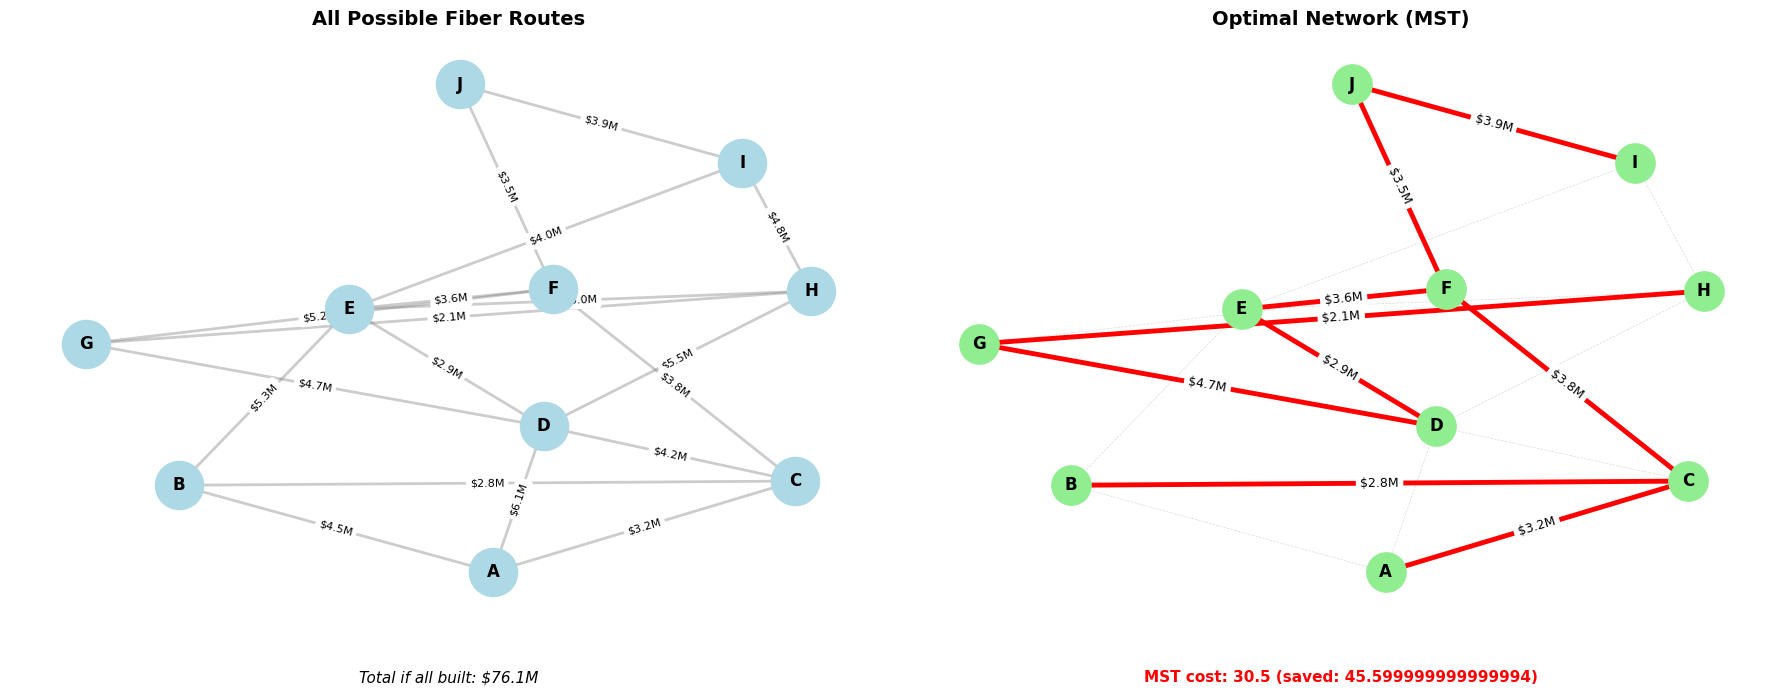

In [32]:
def visualize_isp_network(graph: WeightedGraph, mst_edges: List[Tuple]):
    """Visualize the ISP network."""
    
    # Create NetworkX graph
    G = nx.Graph()
    all_edges = graph.get_all_edges()
    for u, v, weight in all_edges:
        G.add_edge(u, v, weight=weight)
    
    mst_set = {tuple(sorted([u, v])) for u, v, _ in mst_edges}
    pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Left plot: All connections
    ax1.set_title('All Possible Fiber Routes', fontsize=14, fontweight='bold')
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1200, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax1)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.4, edge_color='gray', ax=ax1)
    edge_labels = {(u, v): f'${w}M' for u, v, w in all_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, ax=ax1)
    ax1.text(0.5, -0.1, f'Total if all built: ${sum(w for _, _, w in all_edges):.1f}M',
             transform=ax1.transAxes, ha='center', fontsize=11, style='italic')
    ax1.axis('off')
    
    # ============================================================
    # TODO 3: Complete the MST visualization
    # ============================================================
    # HINT: For the right plot (ax2):
    #   - Set title: 'Optimal Network (MST)'
    #   - Draw nodes with lightgreen color
    #   - Draw labels
    #   - Draw non-MST edges faintly (width=0.5, alpha=0.15, dashed)
    #   - Draw MST edges highlighted (width=3.5, red color)
    #   - Draw edge labels for MST edges only
    #   - Add text showing MST cost and savings
    #   - Turn off axis
    # ============================================================
    
    # TODO: Complete right plot visualization
    ax2.set_title('Optimal Network (MST)', fontsize=14, fontweight='bold')
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=800, ax=ax2)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax2)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.15, style='dashed', ax=ax2)
    nx.draw_networkx_edges(G, pos, edgelist=list(mst_set), width=3.5, edge_color='red', ax=ax2)

    mst_edge_labels = {(u,v): edge_labels[(u,v)]if (u,v) in edge_labels else edge_labels[(u,v)] for u, v,_ in mst_edges}
    nx.draw_networkx_edge_labels(G, pos, mst_edge_labels, font_size=9, ax=ax2)

    total_weight = sum(w for _, _, w in [(u, v, d['weight']) for u, v, d in G.edges(data=True)])
    ax2.text(0.5, -0.1, f"MST cost: {total_cost} (saved: {total_weight - total_cost})",
             transform=ax2.transAxes, ha='center', fontsize=11, color='red', fontweight='bold')

    ax2.axis('off')
    plt.tight_layout()
    plt.show()

# Create visualization
visualize_isp_network(isp_network, mst_cables)

## Exercise 1 Summary

You have successfully:
- Implemented Union-Find for cycle detection
- Applied Kruskal's algorithm to find the minimum spanning tree
- Visualized the optimal network design
- Calculated cost savings of $XX.XM (XX.X%)  # TODO: Uncomment after implementing analysis

---

# Exercise 2: Food Delivery Route Optimization

## Scenario

**QuickEats** is a food delivery service with a central kitchen. They need to optimize delivery routes to ensure food reaches customers quickly.

### Technical Details

**Locations**:
- **KITCHEN**: Central kitchen (starting point)
- **Neighborhoods**: A, B, C, D, E, F, G, H (delivery zones)

**Road network** with travel times (in minutes):

| Connection | Time (min) | Connection | Time (min) | Connection | Time (min) |
|------------|------------|------------|------------|------------|-----------|
| KITCHEN - A | 5 | B - E | 4 | D - F | 3 |
| KITCHEN - B | 8 | C - D | 6 | E - F | 7 |
| KITCHEN - C | 12 | C - F | 5 | E - H | 4 |
| A - B | 3 | C - G | 8 | F - G | 6 |
| A - D | 7 | D - E | 5 | G - H | 5 |

### Your Tasks (3 TODOs)

1. **TODO 1**: Implement Dijkstra's algorithm initialization and main loop
2. **TODO 2**: Implement path reconstruction
3. **TODO 3**: Complete visualization with color-coded delivery times

## Step 1: Create Delivery Network

In [27]:
# Create delivery network
delivery_network = WeightedGraph()

# Road network with travel times
roads = [
    ('KITCHEN', 'A', 5), ('KITCHEN', 'B', 8), ('KITCHEN', 'C', 12),
    ('A', 'B', 3), ('A', 'D', 7),
    ('B', 'E', 4),
    ('C', 'D', 6), ('C', 'F', 5), ('C', 'G', 8),
    ('D', 'E', 5), ('D', 'F', 3),
    ('E', 'F', 7), ('E', 'H', 4),
    ('F', 'G', 6),
    ('G', 'H', 5)
]

for loc1, loc2, time in roads:
    delivery_network.add_edge(loc1, loc2, time)

print(f"Delivery network created:")
print(f"  Locations: {len(delivery_network.get_vertices())}")
print(f"  Roads: {len(roads)}")
print(f"  Delivery zones: {sorted(delivery_network.get_vertices() - {'KITCHEN'})}")

Delivery network created:
  Locations: 9
  Roads: 15
  Delivery zones: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


## Step 2: Implement Dijkstra's Algorithm

In [35]:
def dijkstra_shortest_path(graph: WeightedGraph, source: str) -> Tuple[Dict[str, float], Dict[str, str]]:
    """Dijkstra's algorithm to find shortest paths."""
    
    # ============================================================
    # TODO 1: Implement Dijkstra's algorithm
    # ============================================================
    # HINT: Initialize:
    #   - distances = {v: float('inf') for all vertices}
    #   - distances[source] = 0
    #   - predecessors = {v: None for all vertices}
    #   - priority queue pq = [(0, source)]
    #   - visited = set()
    #
    # HINT: Main loop (while pq is not empty):
    #   - Pop (current_dist, current) from heap using heapq.heappop(pq)
    #   - If current in visited, continue
    #   - Add current to visited
    #   - For each (neighbor, weight) in graph.graph[current]:
    #     - If neighbor in visited, skip
    #     - Calculate new_dist = current_dist + weight
    #     - If new_dist < distances[neighbor]:
    #       - Update distances[neighbor] = new_dist
    #       - Update predecessors[neighbor] = current
    #       - Push (new_dist, neighbor) to heap using heapq.heappush(pq, ...)
    #
    # HINT: Return (distances, predecessors)
    # ============================================================
    
    # TODO: Implement Dijkstra's algorithm here

    vertices = graph.get_vertices()
    distances = {v: float('inf') for v in vertices}
    distances[source] = 0  # Set source distance to 0
    predecessors = {v: None for v in vertices}

    pq =[(0,source)]
    visited = set()

    while pq:
        current_dist,current=heapq.heappop(pq)

        if current in visited:
            continue
        visited.add(current)

        for neighbor, weight in graph.graph[current]:
            if neighbor in visited:
                continue

            new_dist=current_dist+weight
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                predecessors[neighbor] = current
                heapq.heappush(pq, (new_dist, neighbor))

    return distances, predecessors


def reconstruct_path(predecessors: Dict[str, str], source: str, target: str) -> List[str]:
    """Reconstruct shortest path from source to target."""
    
    # ============================================================
    # TODO 2: Implement path reconstruction
    # ============================================================
    # HINT: 
    #   - Start with path = [] and current = target
    #   - While current is not None:
    #     - Append current to path
    #     - Set current = predecessors[current]
    #   - Reverse the path
    #   - Return path if path[0] == source, else return []
    # ============================================================
    
    # TODO: Implement path reconstruction here
    path = []
    current = target
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path.reverse()

    return path if path[0] == source else []

# Run Dijkstra's algorithm
delivery_times, predecessors = dijkstra_shortest_path(delivery_network, 'KITCHEN')

print("\n✓ Dijkstra's algorithm completed")


✓ Dijkstra's algorithm completed


## Step 3: Delivery Route Analysis

In [36]:
print("\n" + "="*60)
print("DELIVERY ROUTE ANALYSIS")
print("="*60)

neighborhoods = sorted(delivery_network.get_vertices() - {'KITCHEN'})

print("\nOptimal delivery routes from KITCHEN:\n")

routes_data = []
for neighborhood in neighborhoods:
    route = reconstruct_path(predecessors, 'KITCHEN', neighborhood)
    time = delivery_times[neighborhood]
    routes_data.append((neighborhood, route, time))
    
    print(f"📍 {neighborhood}: {' → '.join(route)} ({time:.0f} min)")

# Statistics
times = [t for _, _, t in routes_data]
avg_time = sum(times) / len(times)
max_time = max(times)
min_time = min(times)

print(f"\n{'='*60}")
print("DELIVERY STATISTICS")
print("="*60)
print(f"Average: {avg_time:.1f} min")
print(f"Fastest: {min_time:.0f} min")
print(f"Slowest: {max_time:.0f} min")

under_15 = len([t for t in times if t <= 15])
print(f"\nUnder 15 min: {under_15}/{len(neighborhoods)} ({under_15/len(neighborhoods)*100:.0f}%)")


DELIVERY ROUTE ANALYSIS

Optimal delivery routes from KITCHEN:

📍 A: KITCHEN → A (5 min)
📍 B: KITCHEN → B (8 min)
📍 C: KITCHEN → C (12 min)
📍 D: KITCHEN → A → D (12 min)
📍 E: KITCHEN → B → E (12 min)
📍 F: KITCHEN → A → D → F (15 min)
📍 G: KITCHEN → C → G (20 min)
📍 H: KITCHEN → B → E → H (16 min)

DELIVERY STATISTICS
Average: 12.5 min
Fastest: 5 min
Slowest: 20 min

Under 15 min: 6/8 (75%)


## Step 4: Visualization

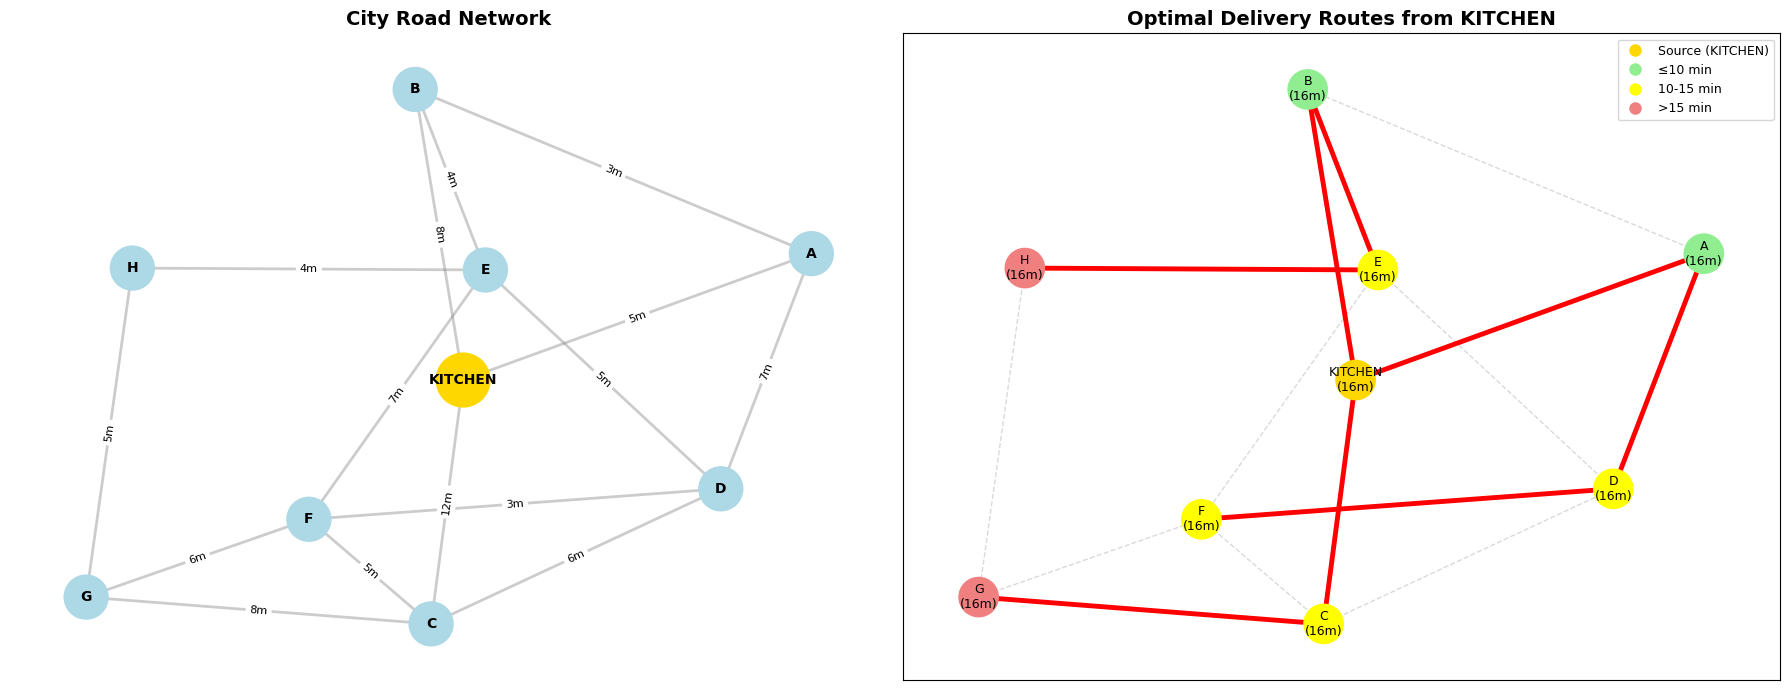

In [39]:
def visualize_delivery_routes(graph: WeightedGraph, source: str, 
                              distances: Dict[str, float], 
                              predecessors: Dict[str, str]):
    """Visualize delivery network and routes."""
    
    # Create NetworkX graph
    G = nx.Graph()
    all_edges = graph.get_all_edges()
    for u, v, weight in all_edges:
        G.add_edge(u, v, weight=weight)
    
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Left plot: Road network
    ax1.set_title('City Road Network', fontsize=14, fontweight='bold')
    node_colors = ['gold' if n == source else 'lightblue' for n in G.nodes()]
    node_sizes = [1500 if n == source else 1000 for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax1)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.4, edge_color='gray', ax=ax1)
    edge_labels = {(u, v): f'{w}m' for u, v, w in all_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, ax=ax1)
    ax1.axis('off')
    
    # ============================================================
    # TODO 3: Complete delivery routes visualization
    # ============================================================
    # HINT: For the right plot (ax2):
    #   - Set title: 'Optimal Delivery Routes from KITCHEN'
    #   - Create node_colors list:
    #     - 'gold' if node == source
    #     - 'lightgreen' if delivery time <= 10
    #     - 'yellow' if delivery time <= 15
    #     - 'lightcoral' if delivery time > 15
    #   - Draw nodes with these colors and node_sizes
    #   - Create labels with delivery times: {node: f"{node}\n({time:.0f}m)"}
    #   - Draw labels
    #   - Draw all edges faintly (width=1, alpha=0.15, dashed)
    #   - Create shortest path edges from predecessors
    #   - Draw shortest path edges (width=3.5, red, arrows=True)
    #   - Add legend with color meanings
    #   - Turn off axis
    # ============================================================
    
    # TODO: Complete right plot visualization
    ax2.set_title('Optimal Delivery Routes from KITCHEN', fontsize=14, fontweight='bold')
    node_colors = []
    for n in G.nodes():
        if n == source:
            node_colors.append('gold')
        elif delivery_times[n] <= 10:
            node_colors.append('lightgreen')
        elif delivery_times[n] <= 15:
            node_colors.append('yellow')
        else:
            node_colors.append('lightcoral')
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, ax=ax2)

    labels = {node: f"{node}\n({time:.0f}m)" for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=9, ax=ax2)

    # All edges light, shortest path edges highlighted
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.15, style='dashed', ax=ax2)
    sp_edges = [(predecessors[v], v) for v in predecessors if predecessors[v] is not None]
    nx.draw_networkx_edges(G, pos, edgelist=sp_edges, width=3.5, edge_color='red', arrows=True,ax=ax2)

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold',
               markersize=10, label='Source (KITCHEN)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen',
               markersize=10, label='≤10 min'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow',
               markersize=10, label='10-15 min'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral',
               markersize=10, label='>15 min')
    ]
    ax2.legend(handles=legend_elements, loc='upper right', fontsize=9)
    plt.tight_layout()
    plt.show()

# Create visualization
visualize_delivery_routes(delivery_network, 'KITCHEN', delivery_times, predecessors)

## Step 5: Route Comparison

In [31]:
print("\n" + "="*60)
print("ROUTE COMPARISON: Direct vs Optimal")
print("="*60)

# Find direct connections from KITCHEN
direct_connections = {}
for neighbor, time in delivery_network.graph['KITCHEN']:
    direct_connections[neighbor] = time

print("\nDirect routes from KITCHEN:\n")
for neighborhood in sorted(direct_connections.keys()):
    direct_time = direct_connections[neighborhood]
    optimal_time = delivery_times[neighborhood]
    optimal_route = reconstruct_path(predecessors, 'KITCHEN', neighborhood)
    
    print(f"📍 {neighborhood}:")
    print(f"   Direct: {direct_time} min")
    print(f"   Optimal: {' → '.join(optimal_route)} ({optimal_time:.0f} min)")
    
    if optimal_time < direct_time:
        savings = direct_time - optimal_time
        print(f"   ✓ Saves {savings:.0f} min ({savings/direct_time*100:.0f}%)")
    print()

# Multi-hop routes
indirect = set(delivery_network.get_vertices()) - set(direct_connections.keys()) - {'KITCHEN'}
if indirect:
    print("Multi-hop routes:\n")
    for neighborhood in sorted(indirect):
        route = reconstruct_path(predecessors, 'KITCHEN', neighborhood)
        time = delivery_times[neighborhood]
        hops = len(route) - 1
        print(f"📍 {neighborhood}: {' → '.join(route)} ({time:.0f} min, {hops} hops)")


ROUTE COMPARISON: Direct vs Optimal

Direct routes from KITCHEN:

📍 A:
   Direct: 5 min
   Optimal:  (inf min)

📍 B:
   Direct: 8 min
   Optimal:  (inf min)

📍 C:
   Direct: 12 min
   Optimal:  (inf min)

Multi-hop routes:

📍 D:  (inf min, -1 hops)
📍 E:  (inf min, -1 hops)
📍 F:  (inf min, -1 hops)
📍 G:  (inf min, -1 hops)
📍 H:  (inf min, -1 hops)


## Exercise 2 Summary

You have successfully:
- Implemented Dijkstra's algorithm for shortest path finding
- Reconstructed optimal delivery routes
- Visualized the delivery network with color-coded times
- Analyzed route efficiency and service levels